
## Import Library

In [588]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import string
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from collections import Counter



#### Load the dataset

In [458]:
df=pd.read_csv('spam.csv')

#### Sample of the dataset

In [460]:
df.sample(5)

,Category,Message
1683,ham,HI BABE U R MOST LIKELY TO BE IN BED BUT IM SO...
3114,ham,"Wat time liao, where still got."
3155,spam,Not heard from U4 a while. Call 4 rude chat pr...
5266,ham,HI DARLIN ITS KATE ARE U UP FOR DOIN SOMETHIN ...
4153,ham,What's nannys address?


#### Check the shape of the dataset

In [462]:
df.shape

(5572, 2)

## Data Cleaning

In [464]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [470]:
#missing value
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [472]:
#check for duplicate value
df.duplicated().sum()

415

In [474]:
#remove duplicates
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [476]:
df.shape

(5157, 2)

## EDA

In [478]:
df['Category'].value_counts()

Category
ham     4516
spam     641
Name: count, dtype: int64

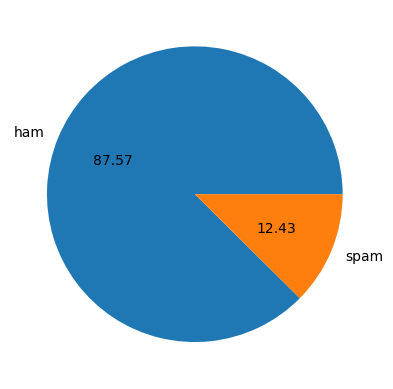

In [480]:
plt.pie(df['Category'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [44]:
# Data is imbalance

In [482]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91938\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [484]:
df['num_characters']=df['Message'].apply(len)
df.head()

,Category,Message,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [486]:
# num of words
df['num_words']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,Category,Message,num_characters,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [488]:
# num of sentence
df['num_sentences']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Category,Message,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [490]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [492]:
#ham
df[df['Category']=='ham'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [494]:
#spam
df[df['Category']=='spam'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


#### Plot histograms

C:\Users\91938\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91938\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

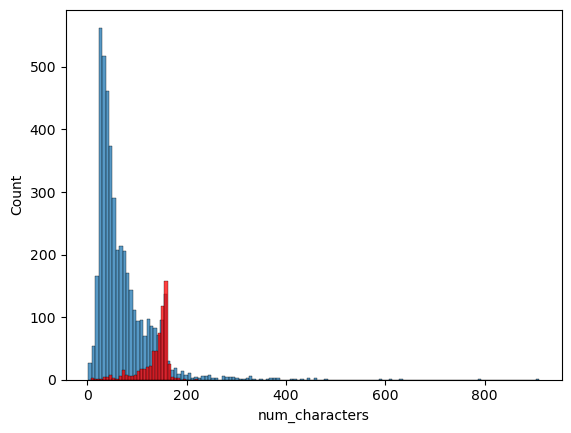

In [496]:
sns.histplot(df[df['Category']=='ham']['num_characters'])
sns.histplot(df[df['Category']=='spam']['num_characters'],color='red')

C:\Users\91938\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91938\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

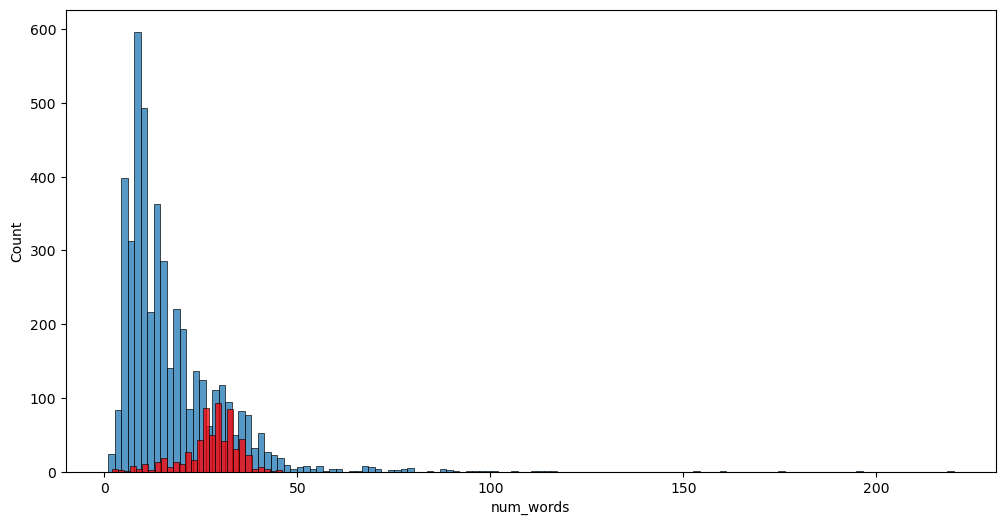

In [498]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category']=='ham']['num_words'])
sns.histplot(df[df['Category']=='spam']['num_words'],color='red')

#### Plot Pairplots

C:\Users\91938\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91938\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91938\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


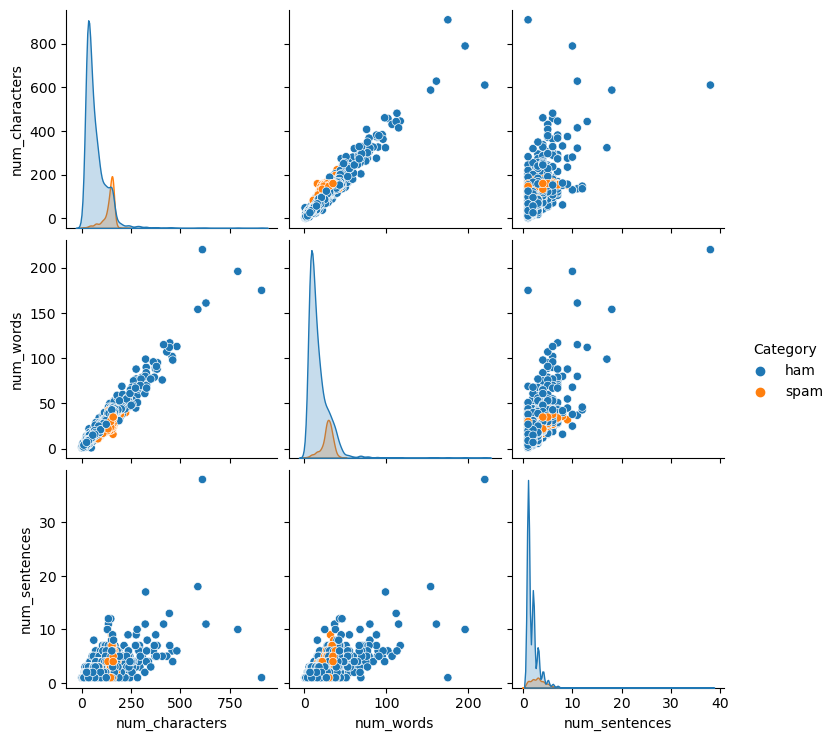

In [500]:
sns.pairplot(df,hue='Category')

In [96]:
#sns.heatmap(df.corr())

## Data Preprocessing

In [502]:
ps =PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

#### Apply text transformation

In [504]:
df['transformed_text'] = df['Message'].apply(transform_text)
df.head()

,Category,Message,num_characters,num_words,num_sentences,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


#### Word cloud visualization for Spam

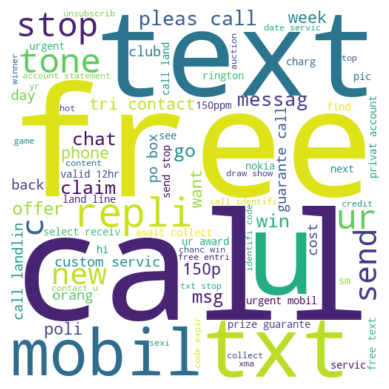

In [508]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
spam_wc = wc.generate(df[df['Category'] == 'spam']['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Word cloud visualization for Spam

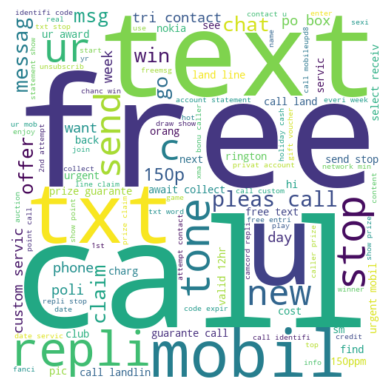

In [510]:
ham_wc = wc.generate(df[df['Category'] == 'spam']['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Model Building

#### Vectorization and feature extraction

In [516]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [518]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [520]:
X.shape

(5157, 3000)

In [522]:
y = df['Category'].values

In [524]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

#### Initialize classifiers

In [526]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

#### Label encoding

In [ ]:
label_encoder = LabelEncoder()
y_true_numeric = label_encoder.fit_transform(y_test)  # Assuming y_test is your true labels
y_pred_numeric = label_encoder.transform(y_pred)     # Assuming y_pred2 is your predicted labels

#### Train and evaluate Gaussian Naive Bayes

In [536]:

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

# Fit the Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict on the test set
y_pred = gnb.predict(X_test)

# Convert y_test and y_pred to numeric labels using label_encoder
y_true_numeric = label_encoder.transform(y_test)
y_pred_numeric = label_encoder.transform(y_pred)

# Check if both y_true_numeric and y_pred_numeric are numeric
print("y_true_numeric type:", y_true_numeric.dtype)
print("y_pred_numeric type:", y_pred_numeric.dtype)

# Calculate metrics
print("Accuracy:", accuracy_score(y_true_numeric, y_pred_numeric))
print("Confusion Matrix:\n", confusion_matrix(y_true_numeric, y_pred_numeric))
print("Precision:", precision_score(y_true_numeric, y_pred_numeric, pos_label=label_encoder.transform(['spam'])[0]))

y_true_numeric type: int32
y_pred_numeric type: int32
Accuracy: 0.8672480620155039
Confusion Matrix:
 [[785 120]
 [ 17 110]]
Precision: 0.4782608695652174


#### Train and evaluate Multinomial Naive Bayes

In [538]:
mnb.fit(X_train, y_train)
y_pred_numeric1 = mnb.predict(X_test)

# Convert y_true and y_pred to numeric using label_encoder
y_true_numeric = label_encoder.transform(y_test)
y_pred_numeric1 = label_encoder.transform(y_pred_numeric1)

# Calculate metrics
print("Accuracy:", accuracy_score(y_true_numeric, y_pred_numeric1))
print("Confusion Matrix:")
print(confusion_matrix(y_true_numeric, y_pred_numeric1))
print("Precision:", precision_score(y_true_numeric, y_pred_numeric1))

Accuracy: 0.9709302325581395
Confusion Matrix:
[[905   0]
 [ 30  97]]
Precision: 1.0


#### Train and evaluate Bernoulli Naive Bayes

In [540]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

# Predict on the test set
y_pred3 = bnb.predict(X_test)

# Calculate metrics
print("Accuracy:", accuracy_score(y_test, y_pred3))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred3))
print("Precision:", precision_score(y_test, y_pred3, pos_label='spam'))

Accuracy: 0.9835271317829457
Confusion Matrix:
[[903   2]
 [ 15 112]]
Precision: 0.9824561403508771


#### Define classifiers for ensemble methods

In [542]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
#xgb = XGBClassifier(n_estimators=50,random_state=2)

#### Create a dictionary of classifiers

In [550]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    #'xgb':xgb
}

#### Function to train and evaluate classifiers

In [552]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

#### Evaluate classifiers and store performance metrics

In [554]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Replace with your split logic
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='spam')  # Specify 'spam' as pos_label for precision
    
    print(f'For {name}:')
    print('Accuracy -', accuracy)
    print('Precision -', precision)
    
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)


For SVC:
Accuracy - 0.9767441860465116
Precision - 0.9516129032258065
For KN:
Accuracy - 0.9127906976744186
Precision - 1.0
For NB:
Accuracy - 0.9777131782945736
Precision - 1.0
For DT:
Accuracy - 0.939922480620155
Precision - 0.8425925925925926
For LR:
Accuracy - 0.9515503875968992
Precision - 0.8909090909090909
For RF:
Accuracy - 0.9777131782945736
Precision - 0.9829059829059829
For AdaBoost:
Accuracy - 0.9583333333333334
Precision - 0.8780487804878049
For BgC:
Accuracy - 0.9641472868217055
Precision - 0.8613138686131386
For ETC:
Accuracy - 0.9796511627906976
Precision - 0.9831932773109243
For GBDT:
Accuracy - 0.9544573643410853
Precision - 0.9405940594059405


#### Create a DataFrame to compare classifier performances

In [556]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.912791,1.000000
2,NB,0.977713,1.000000
8,ETC,0.979651,0.983193
5,RF,0.977713,0.982906
0,SVC,0.976744,0.951613
9,GBDT,0.954457,0.940594
4,LR,0.951550,0.890909
6,AdaBoost,0.958333,0.878049
7,BgC,0.964147,0.861314
3,DT,0.939922,0.842593


In [558]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.912791
1,NB,Accuracy,0.977713
2,ETC,Accuracy,0.979651
3,RF,Accuracy,0.977713
4,SVC,Accuracy,0.976744
5,GBDT,Accuracy,0.954457
6,LR,Accuracy,0.951550
7,AdaBoost,Accuracy,0.958333
8,BgC,Accuracy,0.964147
9,DT,Accuracy,0.939922


#### Plot the performance comparison

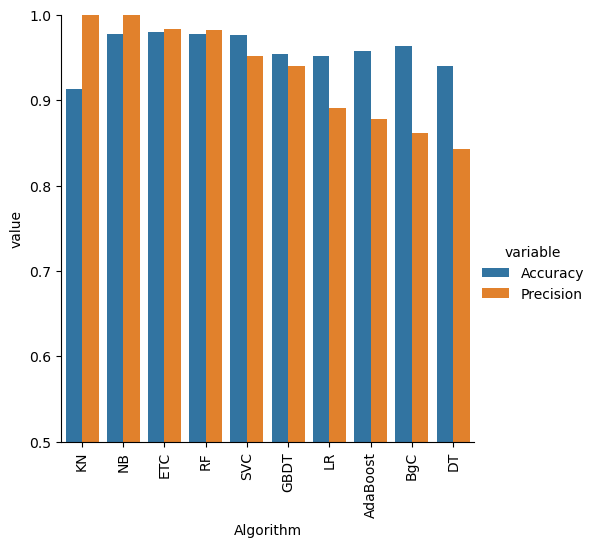

In [560]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [562]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [564]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [566]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [568]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [570]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [572]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.912791,1.000000,0.912791,1.000000,0.912791,1.000000,0.912791,1.000000
1,NB,0.977713,1.000000,0.977713,1.000000,0.977713,1.000000,0.977713,1.000000
2,ETC,0.979651,0.983193,0.979651,0.983193,0.979651,0.983193,0.979651,0.983193
3,RF,0.977713,0.982906,0.977713,0.982906,0.977713,0.982906,0.977713,0.982906
4,SVC,0.976744,0.951613,0.976744,0.951613,0.976744,0.951613,0.976744,0.951613
5,GBDT,0.954457,0.940594,0.954457,0.940594,0.954457,0.940594,0.954457,0.940594
6,LR,0.951550,0.890909,0.951550,0.890909,0.951550,0.890909,0.951550,0.890909
7,AdaBoost,0.958333,0.878049,0.958333,0.878049,0.958333,0.878049,0.958333,0.878049
8,BgC,0.964147,0.861314,0.964147,0.861314,0.964147,0.861314,0.964147,0.861314
9,DT,0.939922,0.842593,0.939922,0.842593,0.939922,0.842593,0.939922,0.842593


In [574]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)


In [578]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [580]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [584]:
y_pred = voting.predict(X_test)

# Calculate and print the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Calculate and print the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Calculate and print the precision score for the 'spam' class
print("Precision:", precision_score(y_test, y_pred, pos_label='spam'))

Accuracy: 0.9893410852713178
Confusion Matrix:
 [[895   1]
 [ 10 126]]
Precision: 0.9921259842519685


In [586]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [590]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [594]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Calculate metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label='spam'))

Accuracy: 0.9903100775193798
Confusion Matrix:
 [[893   3]
 [  7 129]]
Precision: 0.9772727272727273


#### Save models and vectorizer for deployment

In [596]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))